We'll use varFDTD with NLopt Hybrid and Global methods here.

In [5]:
from config import Config
import os, sys
sys.path.append(Config.LUMERICAL_API_PATH) # if this fails adjust the config.py and add the lumerical api path
root_path = Config.ROOT_DIR

import numpy as np
import scipy as sp

import lumapi
from lumopt.utilities.wavelengths import Wavelengths
import lumopt.utilities.wavelengths as w1
from lumopt.geometries.polygon import FunctionDefinedPolygon
from lumopt.utilities.materials import Material
from lumopt.figures_of_merit.modematch import ModeMatch
from lumopt.optimization import Optimization
from lumopt.optimizers.generic_optimizers import ScipyOptimizers
from lumopt.geometries.geometry import Geometry
from lumopt_gl.geometries.geometry_gl import Geometry_GL
from lumopt_gl.optimizers.optimizer_gl import OptimizerGL
from lumopt_gl.optimization import OptimizationGL

In [6]:
def optimizer2D(polygon, base_script, max_iter = 555, method = 'GN_ORIG_DIRECT_L'):
    wavelengths = Wavelengths(start = 1500e-9, stop = 1600e-9, points = 11)

    fom = ModeMatch(monitor_name = 'fom',mode_number = 'fundamental mode', direction = 'Forward', 
                    target_T_fwd = lambda wl: np.ones(wl.size), norm_p = 1)

    optimizer = OptimizerGL(max_iter = max_iter, ftol = 1.0e-5, method = method, target_fom = 0.99)

    opt = OptimizationGL(base_script=base_script, wavelengths = wavelengths, fom = fom, geometry = polygon, optimizer = optimizer, 
                       use_var_fdtd=True, store_all_simulations = False)
    return opt

def optimizer3D(polygon, base_script, max_iter = 1000,  method = 'GN_ORIG_DIRECT_L'):
    wavelengths = Wavelengths(start = 1500e-9, stop = 1600e-9, points = 11)

    fom = ModeMatch(monitor_name = 'fom',mode_number = 'fundamental TE mode', direction = 'Forward', 
                    target_T_fwd = lambda wl: np.ones(wl.size), norm_p = 1) # for 3D, we need to specify TE/TM

    optimizer = OptimizerGL(max_iter = max_iter, ftol = 1.0e-5, method = method, target_fom = 0.99)

    opt = OptimizationGL(base_script=base_script, wavelengths = wavelengths, fom = fom, geometry = polygon, optimizer = optimizer, 
                       use_var_fdtd=False, store_all_simulations = False, GPU = True) # and set varFDTD to False. Set GPU to True if you have one.
    return opt

Lets try a global optimization method, DIRECT_L. 

In [8]:
from geometries.taper import taper_geo

taper, base_script = taper_geo(dimension=3, mesh = 2, num_params = 6)

opt = optimizer3D(taper, base_script, method = 'GN_ORIG_DIRECT_L')

Accurate interface detection enabled


Wavelength range of source object will be superseded by the global settings.


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:19: MatplotlibDeprecationWarning: 
The 'clear_temp' parameter of setup() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'clear_temp', they should be passed as keyword, not positionally.
  super().setup(fig, dpi, frame_prefix, clear_temp = False)


Running NLopt optimizer
start = [3.0e-07 3.5e-07 4.0e-07 4.5e-07 5.0e-07 5.5e-07]
Making forward solve
Running solves
Processing forward solve
FOM = 0.8607680049056415
Saved frame
False
Making forward solve
Running solves


c:\Users\shahe\Documents\GitHub\Lumopt_GL\lumopt_gl\optimizers\optimizer_gl.py:80: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.min_or_max is 'min':
c:\Users\shahe\Documents\GitHub\Lumopt_GL\lumopt_gl\optimizers\optimizer_gl.py:80: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.min_or_max is 'min':


KeyboardInterrupt: 

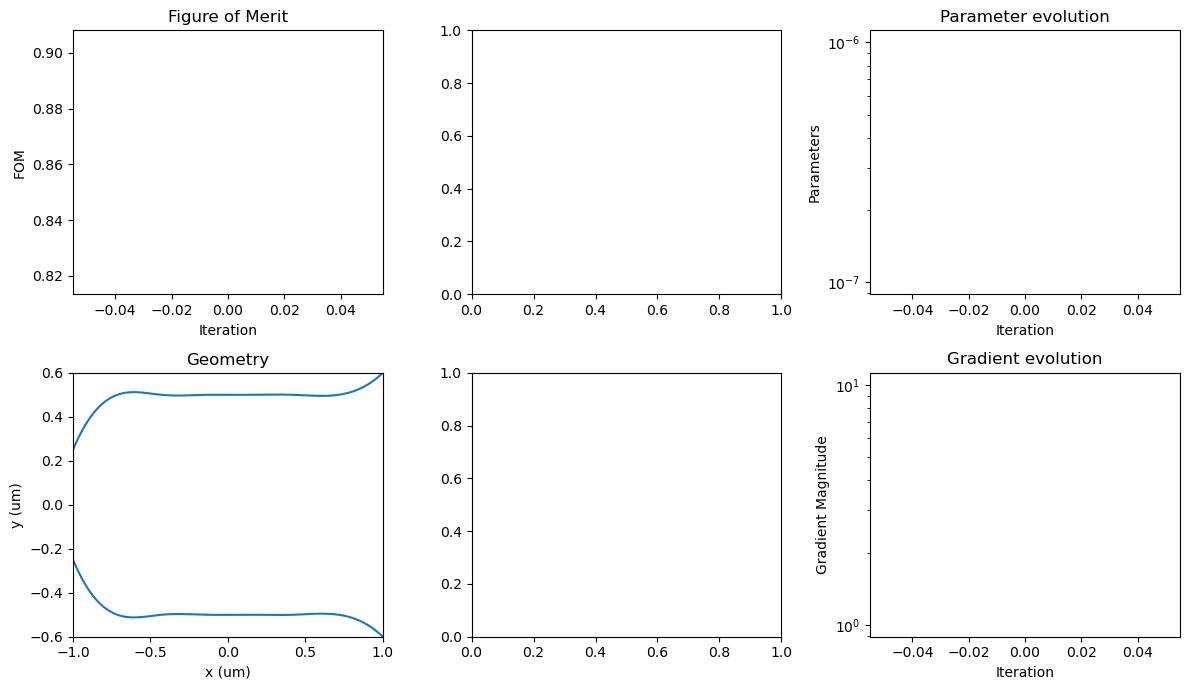

In [9]:
opt.run()

Reasonably good performance. These global optimizers are great for establishing performance bounds with varFDTD.

We'll now look at hybrid methods. These use global and local optimizers both. It will use whatever global method you provide but switch to LD_MMA for fine tuning.

In [ ]:
from geometries.taper import taper_geo

taper, base_script = taper_geo(dimension=2, mesh = 2, num_params = 6)

opt = optimizer2D(taper, base_script, method = 'GD_MLSL')

In [ ]:
opt.run()